# BOOK RECOMMENDATION SYSTEM

## 1. BUSINESS UNDERSTANDING

### 1.1 INTRODUCTION

Books are essential for personal growth, knowledge acquisition, and entertainment. However, in Kenya, finding the right books that cater to diverse tastes has been a challenge. High book prices, limited library access, and a lack of book variety have hindered the reading experience for many Kenyan book enthusiasts. Recognizing this issue, Lonestar Incorporated, a Kenyan startup, has secured funding from Venture Capitalists to revolutionize the book market in Kenya. They aim to provide a wide range of affordable books, both digital and hardcopy, to their customers. To ensure an exceptional reading experience, Lonestar Inc. is launching a website where users can explore and purchase books. However, in order for their website and company to be successful, they recognize the need for a recommendation system of books that will recommend books to users based on their previous purchases and books other users with similar interests have rated highly.

They have decided to hire their fellow startup company known as Regex Inc., which is a new company consisting of Data Scientists, Analysts, and even Data Engineers. Since the company is still relatively new it does not consist of a lot of personnel. However, the current personnel have been given the task of building a recommendation system for Lonestar Inc. to use for their website. They are to deploy this model to their site with the help of those who created their website and they are finally to present what they did to a board of members consisting of Lonestar Inc. members to show their results of modeling.


### 1.2 OBJECTIVES

#### 1.2.1 MAIN OBJECTIVE

To build a model that recommends books to users based on what they have read before and what other users with similar interests have also read and liked.

#### 1.2.2 SPECIFIC OBJECTIVES

-	Design a sophisticated recommendation algorithm for book suggestions.

-	Utilize user profiles, reading history, and user-generated ratings for model training.

-	Ensure diverse book recommendations spanning different genres and interests.

-	Seamlessly integrate the recommendation system into Lonestar Incorporated's website.

-	Monitor and evaluate user engagement metrics, such as click-through rates and page views.

-	Analyze the impact of the recommendation system on book sales and revenue generation.

-	Comply with data protection regulations to safeguard user privacy.

-	Collaborate closely with the website development team for integration.

-	Deploy the recommendation model on the website for real-time book suggestions.

-	Prepare and deliver a comprehensive presentation to the Lonestar Inc. board members showcasing the project's results and impact.


### 1.3 PROBLEM STATEMENT

Lonestar Incorporated, a Kenyan startup aiming to revolutionize the book market in Kenya, faces the challenge of providing an exceptional reading experience to their customers. The primary problem is the lack of a book recommendation system on their website. Users currently have no efficient way to discover books tailored to their preferences and reading history. Lonestar Inc. seeks to implement a recommendation system that can suggest books to users based on their previous purchases and ratings by users with similar interests. The problem at hand is to design, build, and deploy an effective book recommendation system that enhances user engagement, drives book sales, and improves the overall reading experience on their website.

### 1.4 MEASURE OF SUCCESS

To achieve as low RMSE as possible.

## 2. DATA UNDERSTANDING

The dataset was sourced from https://maciejkula.github.io/spotlight/datasets/goodbooks.html. Here are the libraries to be used.

In [2]:
# For analysis and data manipulation
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Spectral")  # Setting style for plots
sns.set_style("darkgrid")
%matplotlib inline

# Surprise module and methods for the recommendation system
from surprise import Dataset, Reader
from surprise import SVD as SVD1  # Basic version of SVD
from surprise.prediction_algorithms import SVD as SVD2   # More advanced version of SVD for fine tuning the model
from surprise import KNNBasic
from surprise import NMF
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV  # for fine tuning the model



### 2.1 RATINGS

These are the ratings given to various books by users.

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


**As can be seen above the columns for ratings are `userId`, `movieId` and `rating`.**

 These are defined as follows:
 - **UserId** : The unique identification of the user who gave the rating for a specific book to help know ratings given by a user or other users.
 
 - **book_id** : The unique identification of a book of which the user gave a rating, to help know the ratings given to books. This is to be able to recommend correctly if a user is new to the system based on ratings of users with similar interests.

 - **rating** : The rating given by a user to a specific book starting from 0 to 5 which is the highest score. This is to help in content and collaborative filtering.

### 2.2 BOOKS

This dataset contains information about books, including details like book IDs, authors, original publication years, and various ratings and counts related to the books.

In [4]:
books = pd.read_csv('books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


The dataset provides detailed information about a collection of books, including their unique identifiers, author information, publication year, and various attributes relevant for book recommendations. It is a valuable resource for tasks such as book recommendations and literary analysis. Below is an overview of the columns in the dataset:

- `book_id`: The unique identifier for each book.
- `goodreads_book_id`: The book's identifier in the Goodreads database.
- `best_book_id`: The best book identifier.
- `work_id`: The work identifier.
- `books_count`: The number of editions/versions of the book.
- `isbn`: The International Standard Book Number of the book.
- `isbn13`: The ISBN-13 number for the book.
- `authors`: The author(s) of the book.
- `original_publication_year`: The year the book was originally published.
- `original_title`: The original title of the book.
- ...

The dataset provides rich information about the books, which can be leveraged for various analytical and recommendation purposes.

For example, the `book_id` can be used to uniquely identify each book, while the `original_publication_year` can help in understanding the historical context of the books. With this data, one can explore book popularity, authorship trends, and even create recommendation systems to suggest books to users based on their interests and reading history.


### 2.3 TAGS

In [5]:
tags = pd.read_csv('tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


The dataset contains information about tags, including their unique identifiers and tag names. Tags are commonly used in various contexts for categorizing and labeling items. This dataset is particularly useful for tasks that involve tagging, categorization, and classification. Below is an overview of the columns in the dataset:

- `tag_id`: A unique numerical identifier for each tag.
- `tag_name`: The name of the tag.

The dataset provides a straightforward way to associate names with unique tag identifiers, making it suitable for applications such as content classification, labeling, and organization. Users can easily map tag names to their respective IDs and vice versa for effective data management and analysis.

For instance, the `tag_id` column is essential for database indexing and identification, while the `tag_name` column serves as the human-readable label for the corresponding tags. Such datasets are valuable in contexts like content management systems and data-driven applications where accurate tagging is essential for efficient data retrieval and analysis.

**These are the columns present in all the dataframes and even though we may drop some the remaining ones will be useful in building a recommendation system in their own way. Now we move on to the Data Preparation phase of the project.**

## 3. DATA PREPARATION

### 3.1 Combining dataframes into one

Joining dataframes into one to make analysis and data preparation easier

In [6]:
# Joining dataframes into one
combined_df = books.merge(ratings, on='book_id').merge(tags, left_on='book_id', right_on='tag_id')

# Results
combined_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating,tag_id,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2886,5,1,--1-
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,6158,5,1,--1-
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,3991,4,1,--1-
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,5281,5,1,--1-
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,5721,5,1,--1-


### 3.2 Missing values

Seeing percentage of missing values and dealing with them appropriately.

In [7]:
def missing_percentage(df):
    """
    Calculate the percentage of missing values for each column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame showing the percentage of missing values
                      and data types for each column.
    """

    # Dictionary for storing the percentage of missing values
    missing_values_percentage = {}

    # Loop for calculating the percentage of missing values and putting values in the dictionary
    for column in df.columns:
        missing_values_percentage[column] = (df[column].isnull().sum() / len(df[column])) * 100

    # Creating a DataFrame from the dictionary
    missing_df = pd.Series(missing_values_percentage)
    missing_df = pd.DataFrame(missing_df, columns=['Percentage Missing'])

    # Creating a new column for the data type of the column with missing values
    missing_df['dtype'] = [df[column].dtypes for column in missing_df.index]

    return missing_df

Using function

In [8]:
missing_percentage(combined_df)

,Percentage Missing,dtype
book_id,0.000000,int64
goodreads_book_id,0.000000,int64
best_book_id,0.000000,int64
work_id,0.000000,int64
books_count,0.000000,int64
isbn,3.561043,object
isbn13,3.087738,float64
authors,0.000000,object
original_publication_year,0.099423,float64
original_title,2.692388,object


**Since columns with missing values is less than `6%` of the data, dropping missing values as it will not have a great impact to our dataframe which has `5976479` entries.**

In [9]:
combined_df.dropna(inplace=True)

Seeing results

In [10]:
missing_percentage(combined_df)

,Percentage Missing,dtype
book_id,0.0,int64
goodreads_book_id,0.0,int64
best_book_id,0.0,int64
work_id,0.0,int64
books_count,0.0,int64
isbn,0.0,object
isbn13,0.0,float64
authors,0.0,object
original_publication_year,0.0,float64
original_title,0.0,object


No more missing values

### 3.3 Duplicates

Checking for duplicates

In [11]:
combined_df.duplicated().sum()

0

No duplicates

### 3.4 Outliers

Checking for outliers in dataframe

In [12]:
# Function for checking the no of outliers in each numeric column in a dataframe
def outliers(df):

    # Dictionary for placing no. of outliers and the column name.
    outliers_dict = {}
    
    # Isolating numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns.to_list()

    # For loop for checking outliers in every column in the dataframe.
    for column in numeric_columns:
        # Lower quantile
        Q1 = df[column].quantile(0.25)

        # Upper Quantile
        Q3 = df[column].quantile(0.75)

        # Finding IQR
        IQR = Q3 - Q1

        # Defining lower and upper bound
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Finding outliers
        outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = 'The number of outliers is', len(outliers)   

    # Results
    return outliers_dict

In [13]:
# Testing function on dataframe
outliers(combined_df)

{'book_id': ('The number of outliers is', 431153),
 'goodreads_book_id': ('The number of outliers is', 921063),
 'best_book_id': ('The number of outliers is', 690079),
 'work_id': ('The number of outliers is', 913982),
 'books_count': ('The number of outliers is', 652877),
 'isbn13': ('The number of outliers is', 804980),
 'original_publication_year': ('The number of outliers is', 493992),
 'average_rating': ('The number of outliers is', 49845),
 'ratings_count': ('The number of outliers is', 662985),
 'work_ratings_count': ('The number of outliers is', 661362),
 'work_text_reviews_count': ('The number of outliers is', 550639),
 'ratings_1': ('The number of outliers is', 655855),
 'ratings_2': ('The number of outliers is', 631313),
 'ratings_3': ('The number of outliers is', 604001),
 'ratings_4': ('The number of outliers is', 613056),
 'ratings_5': ('The number of outliers is', 687012),
 'user_id': ('The number of outliers is', 0),
 'rating': ('The number of outliers is', 0),
 'tag_id

The numeric columns of the dataframe contain a lot of outliers. However, for the id columns I don't think I'm gonna remove outliers since each unique ID can be different and there are thousands of books each with their own unique IDs so expecting them to land in a specific range is unreasonable. Same logic applies for other ID columns, the `isbn13` column. For the `original_publication_year` column, books were released at various years over centuries hence they cannot fall within specific ranges. And as for the ratings 1 to 5 columns, the number of ratings given may vary hence not fall within specific ranges. Using this logic, we will not remove outliers in this dataframe.

**Moving on to Exploratory Data Analysis.**

## 4. EXPLORATORY DATA ANALYSIS

### 4.1 UNIVARIATE ANALYSIS

#### 4.1.1 What are the top rated books based on average ratings

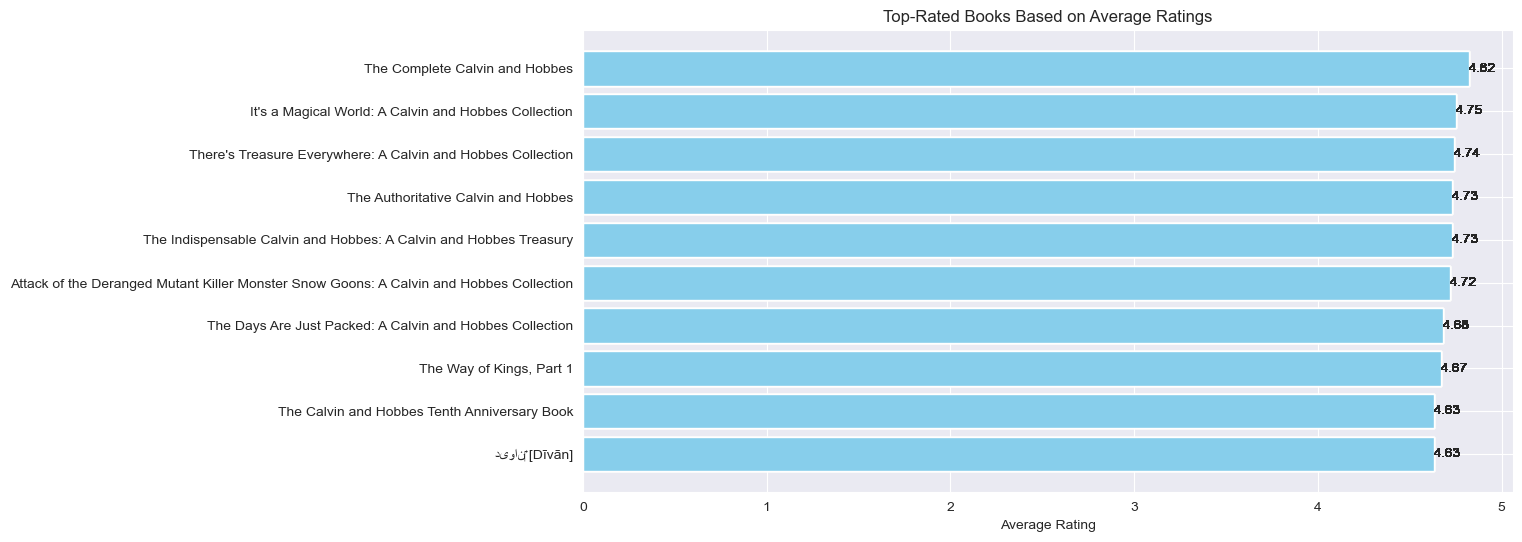

In [14]:
# Grouping the dataset by book_id and calculate the average rating for each book
average_ratings = combined_df.groupby('book_id')['rating'].mean()

# Sorting the books by average rating in descending order to find the top-rated books
top_rated_books = average_ratings.sort_values(ascending=False)

# Getting the top 10 top-rated books and their details
top_rated_books_details = combined_df.loc[combined_df['book_id'].isin(top_rated_books.head(10).index)].sort_values(by='average_rating', ascending=False)

# Creating a bar chart to visualize the top-rated books
plt.figure(figsize=(12, 6))
bars = plt.barh(top_rated_books_details['original_title'], top_rated_books_details['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top-Rated Books Based on Average Ratings')
plt.gca().invert_yaxis()  # Inverting the y-axis to show the highest-rated book at the top

# Adding labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.show()

**It's interesting to note that `8/10` books with the highest average rating have the title `Calvin and Hobbes` meaning they must have been very popular books. Further research shows the books  were created between the years of 1985 and 1995 before the invention of the internet. That and the quality of the books may have contributed to the popularity of the series.**

#### 4.1.2 Is there any trend in the number of books published over the years?

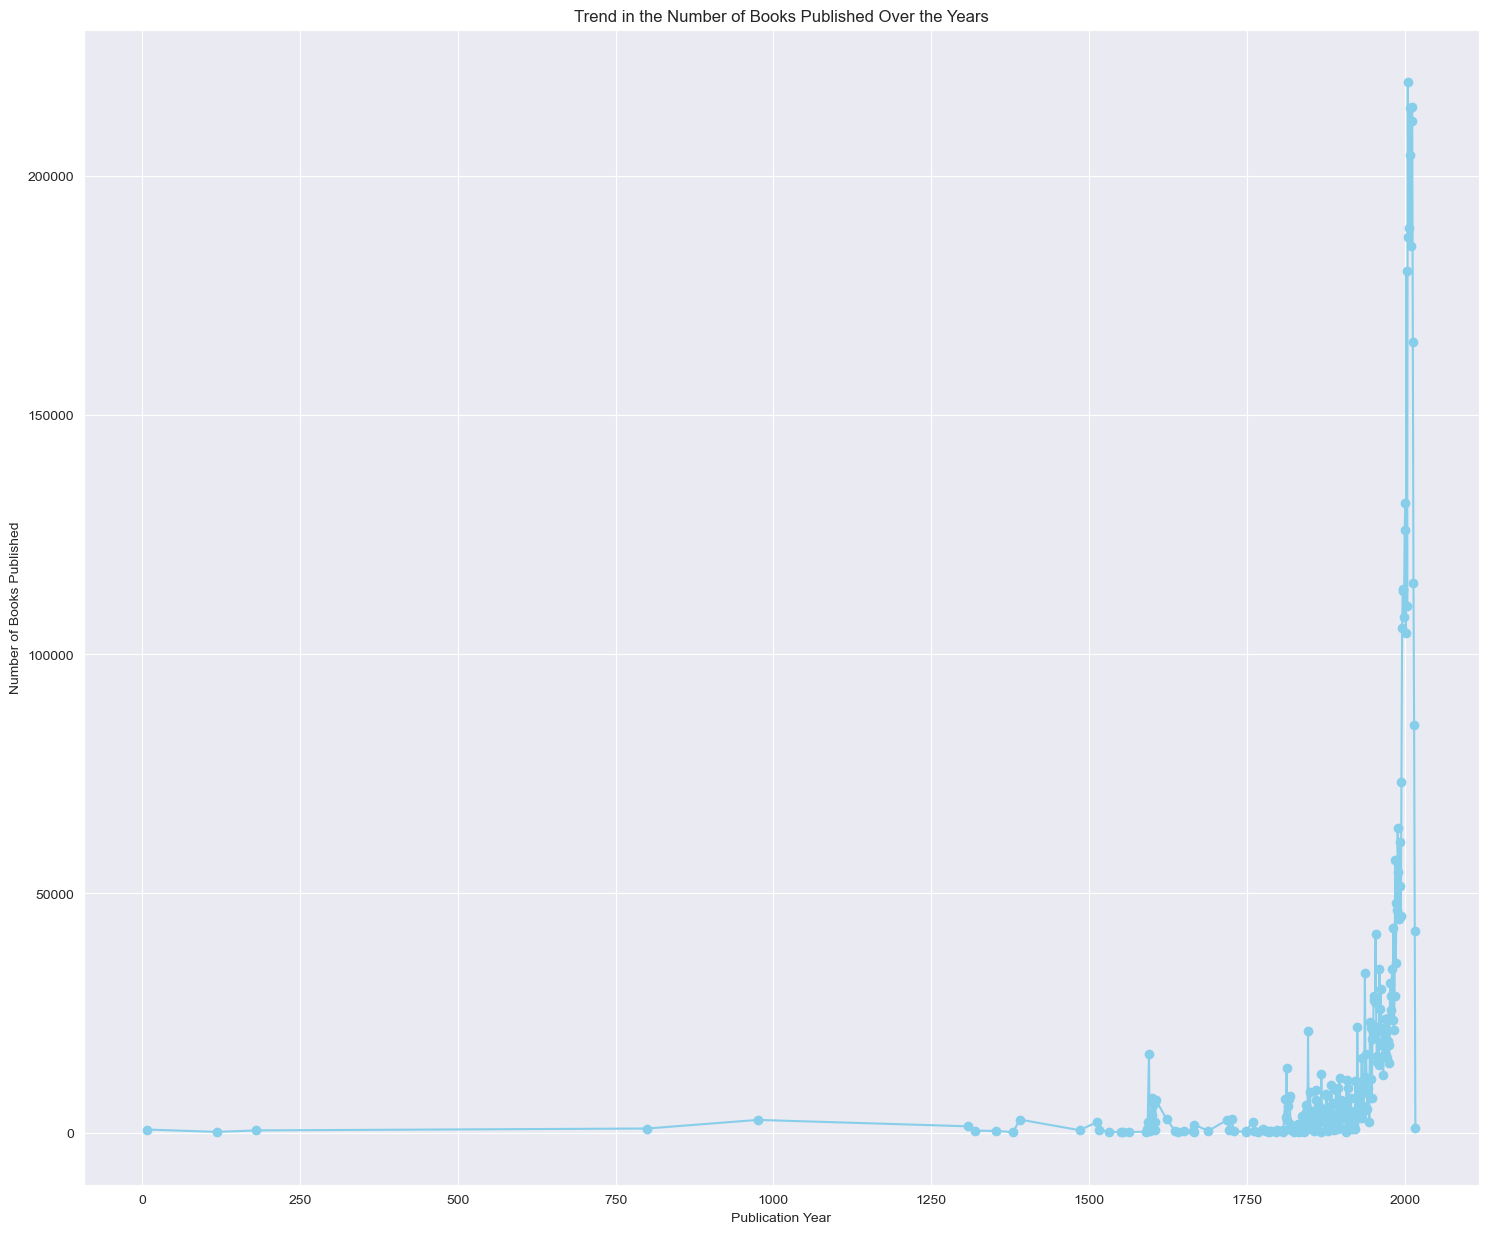

In [15]:
# Grouping the dataset by original_publication_year and count the number of books published each year
books_published_per_year = combined_df['original_publication_year'].value_counts().sort_index()

# Filtering out the missing or invalid publication years (e.g., year <= 0)
books_published_per_year = books_published_per_year[books_published_per_year.index > 0]

# Creating a line chart to visualize the trend in the number of books published over the years
plt.figure(figsize=(18, 15))
plt.plot(books_published_per_year.index, books_published_per_year.values, marker='o', color='skyblue')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books Published')
plt.title('Trend in the Number of Books Published Over the Years')
plt.grid(True)
plt.show()

**From the year `1750` there seems to have been an increase in the number of books released which has increased exponentially through the 1900s up to the year `2000` where there has been a sharp decline in the number of books released. But its interesting to note that even as early as `750 AD` there seems to have been books been released.**

#### 4.1.3 What are the most common tags associated with books?

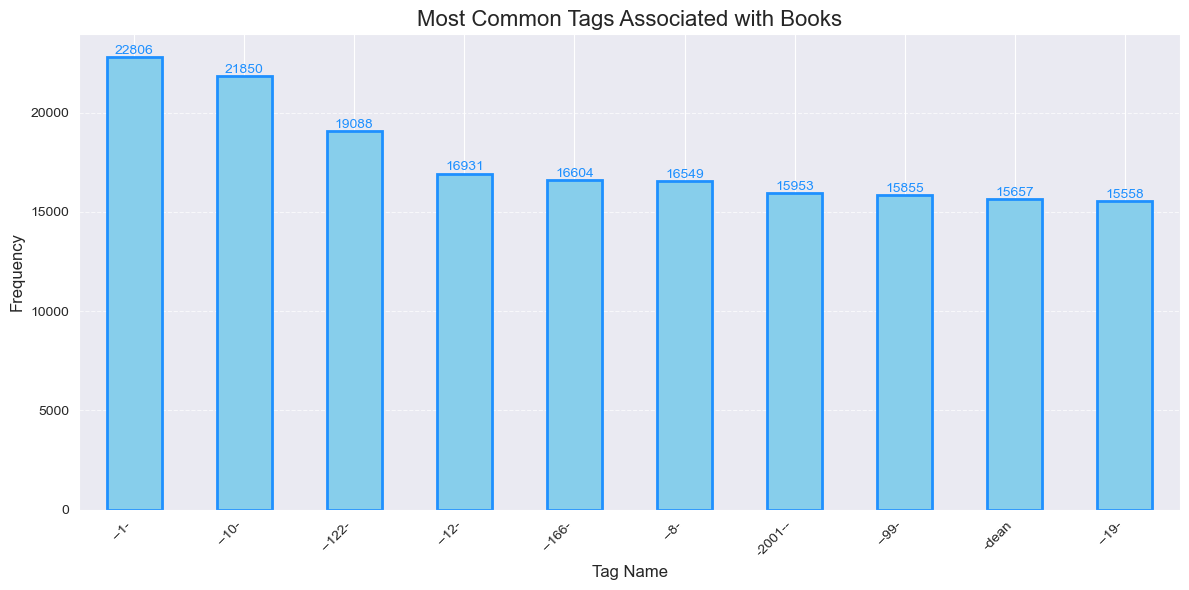

In [16]:
# Grouping the dataset by tag_name and count the frequency of each tag
common_tags = combined_df['tag_name'].value_counts().head(10)

# Creating a visually appealing bar chart
plt.figure(figsize=(12, 6))
common_tags.plot(kind='bar', color='skyblue', edgecolor='dodgerblue', linewidth=2)
plt.xlabel('Tag Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Common Tags Associated with Books', fontsize=16)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels to the bars
for i, v in enumerate(common_tags):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, color='dodgerblue')

plt.tight_layout()
plt.show()

**Here are the most common tags in this dataframe.**

### 4.2 BIVARIATE ANALYSIS

#### 4.2.1 Does the average rating of books correlate with the number of ratings they receive?

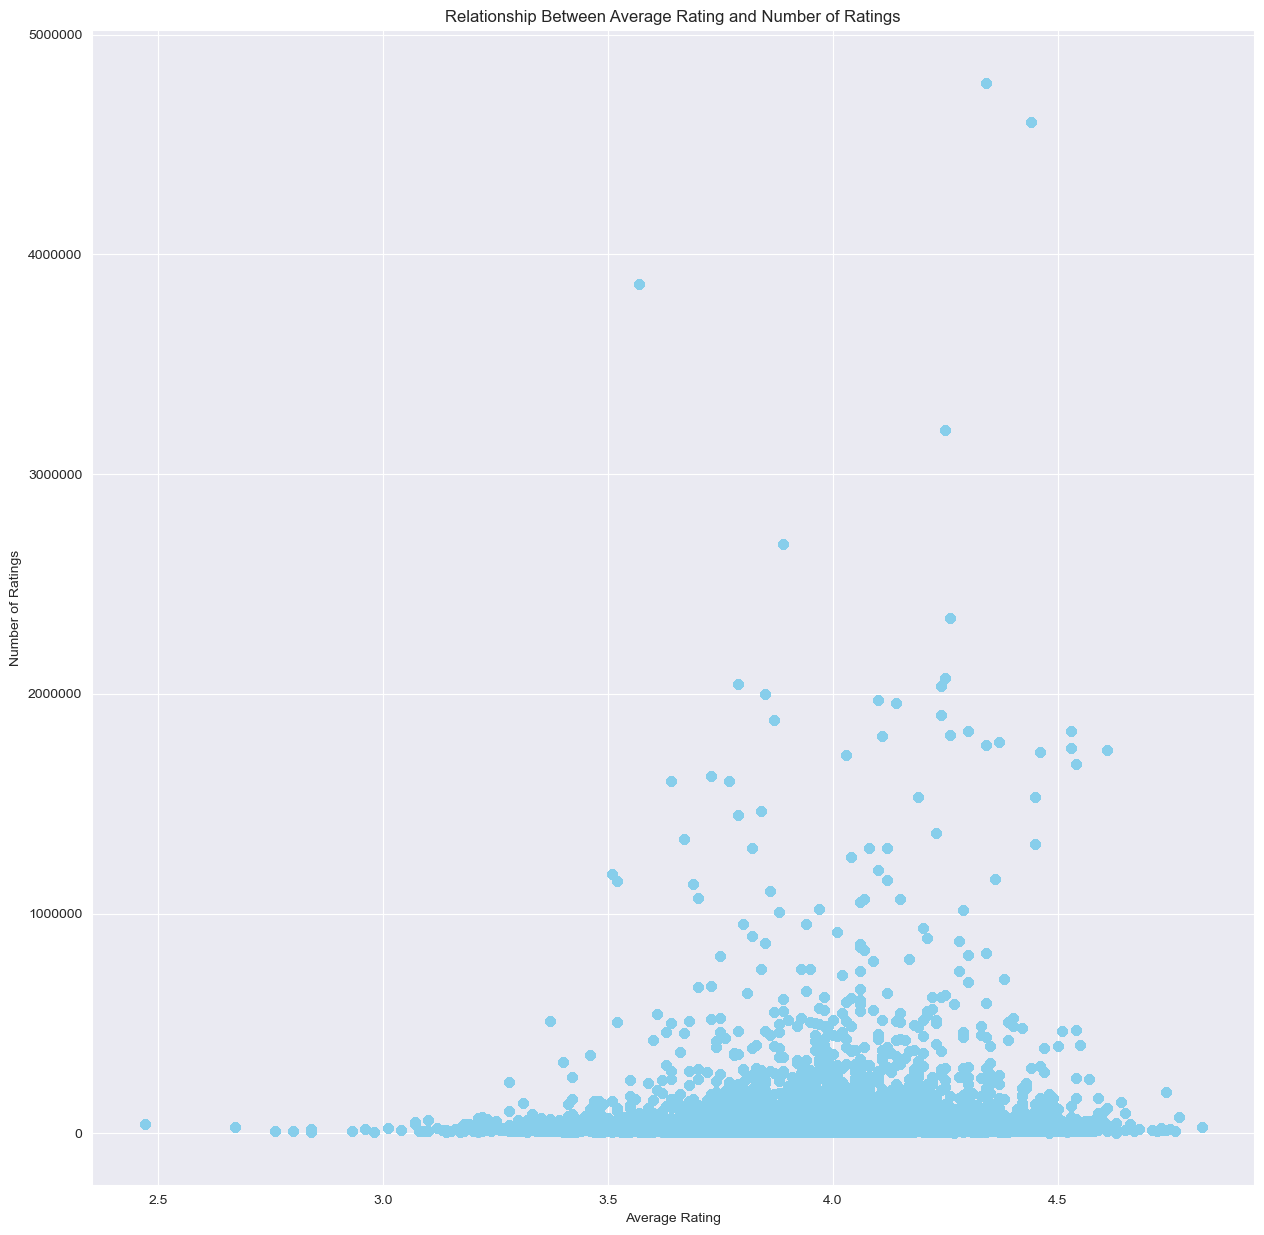

In [17]:
# Create a scatterplot of average_rating vs. ratings_count
plt.figure(figsize=(15, 15))
plt.scatter(combined_df['average_rating'], combined_df['ratings_count'], alpha=0.5, color='skyblue')
plt.title('Relationship Between Average Rating and Number of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')

# Specifying the style for the y-axis labels to display numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)

# Showing the plot
plt.show()

**From here we see that majority of the number of ratings fall between `3.5` and `4.5` but generally we can see that as the average rating increases so does the number of ratings up to around `4.0` where the number of ratings generally decreases with the average rating.**

#### 4.2.2 How does the publication year of books affect their average ratings?

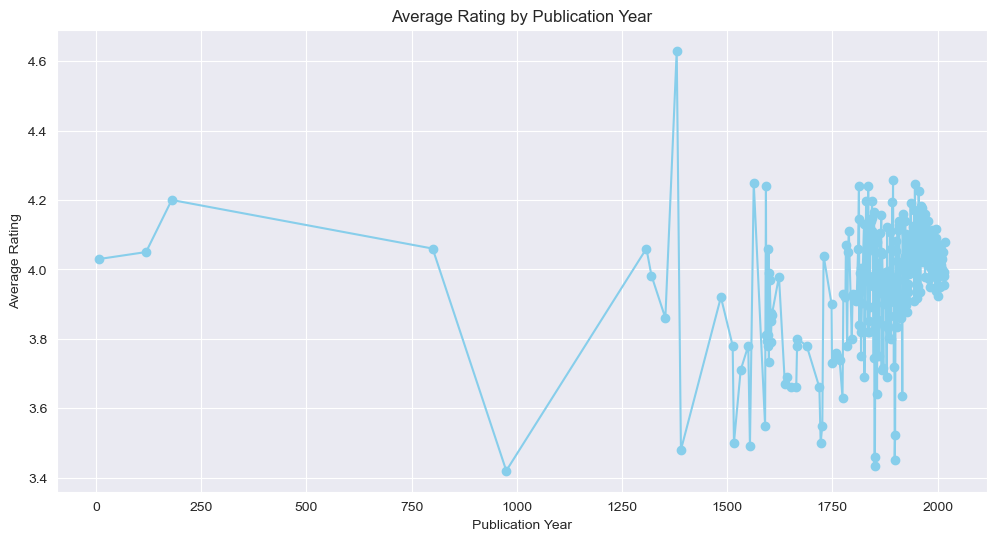

In [18]:
# Grouping the data by publication year and calculate the average rating for each year
average_ratings_by_year = combined_df.groupby('original_publication_year')['average_rating'].mean().reset_index()

# Filtering out missing or zero publication years
average_ratings_by_year = average_ratings_by_year[average_ratings_by_year['original_publication_year'] > 0]

# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year['original_publication_year'], average_ratings_by_year['average_rating'], marker='o', linestyle='-', color='skyblue')
plt.title('Average Rating by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.grid(True)

# Show the plot
plt.show()

**It's interesting to note that books released somewhere in the `1300s` produced the highest average rating overall in all the years but books released between `1750` and `2000` generally perfomed well. Books released somewhere in the year `1000` have the worst average rating overall with an overall decline from `750` up to around the year `1000`.**

#### 4.2.3 Do books with longer titles tend to receive higher or lower ratings?

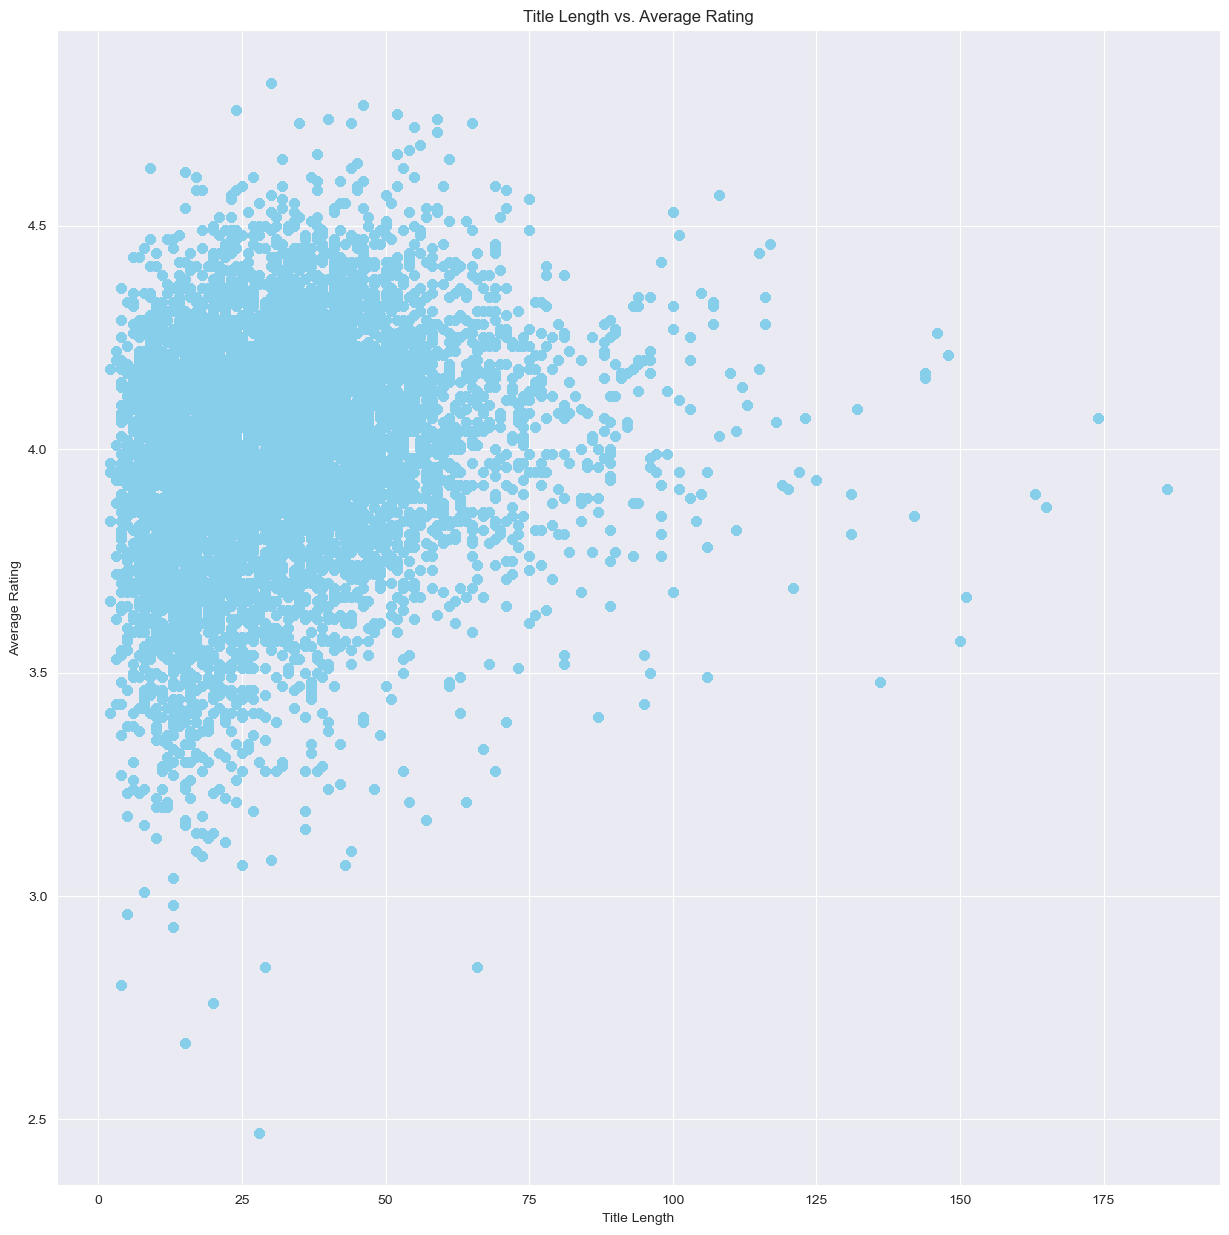

In [19]:
# Getting length of titles
combined_df['title_length'] = combined_df['title'].str.len()

# Creating a scatterplot to visualize the relationship
plt.figure(figsize=(15, 15))
plt.scatter(combined_df['title_length'], combined_df['average_rating'], alpha=0.2, color='skyblue')
plt.title('Title Length vs. Average Rating')
plt.xlabel('Title Length')
plt.ylabel('Average Rating')

plt.show()

**Books with shorter titles specifically with less than `50` words seem to have a higher average rating but generally there seems to be little correlation between the length of the title of a book and its average rating.**

Through EDA we have understood more about the data in question. Now moving on to modelling.

## 5. MODELLING

### 5.1 BASE MODEL

Using `surprise` model to build a base model for our book recommendation system.

In [34]:
# Creating a reading object
reader = Reader(rating_scale=(1, 5))

# Using only 10,000 samples to conserve memory
sample_df = combined_df.sample(n=1000000, random_state=42)

# Loading data to surprise dataset
data = Dataset.load_from_df(combined_df[['book_id', 'user_id', 'rating']], reader)

# Split the data into training and test as usually to train and evaluate
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialising the model which in this case is Singular value decomposition
model = SVD1()

# Training the model and getting predictions and RMSE using one function
def fitter_and_evaluator(model):
    
    """
    Trains data using model, makes predictions on testset and calculates its RMSE

    Parmaeters:
    model - Model to train the data on

    Returns:
    RMSE score of model.

    """
    # Fitting the model
    model.fit(trainset)

    # Making predictions
    predictions = model.test(testset)

    # Calculating RMSE
    rmse = accuracy.rmse(predictions)
    print(f'RMSE: {rmse}')

# Testing the function
fitter_and_evaluator(model)

RMSE: 0.8320
RMSE: 0.8320200100048767


**A starting RMSE of `0.8320` let's use our model to build a recommendation system.**

In [35]:
combined_df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'user_id', 'rating', 'tag_id',
       'tag_name', 'title_length'],
      dtype='object')

#### 5.1.1 BASE MODEL RECOMMENDATION SYSTEM 

In [43]:
# Function to get movie recommendations based on a given movie title
def get_book_recommendations(book_title, model, top_n=5):

    """
    Gives top n book recommendations based on book read.

    Parameters:
    book_title : The title of the book which the user has read.
    model : To be able to fit different models to the function to prevent repeating the function when fine tuning or fitting different models
    top_n : No of recommendations to return default value is 5.

    Returns:
    The top n recommendations based on the input of the user.
    
    """
    # This is to prevent an index error if the movie is not in the dataframe
    try:
        # First we get the Movie_Id for the given movie title
        movie_id = combined_df[combined_df['title'] == book_title]['book_id'].iloc[0]

        # We then get a list of user IDs who have rated the given movie
        users_who_watched = combined_df[combined_df['book_id'] == movie_id]['user_id'].unique()

        # This is a list to store recommendations to give to the user based on what he/she has entered as the movie_title
        recommendations = []

        # Generating recommendations for each user who watched the given movie
        for user_id in users_who_watched:
            
            # Get a list of movie IDs that the user has not rated yet
            unrated_movies = combined_df[(combined_df['user_id'] == user_id) & (combined_df['book_id'] != movie_id)]['book_id'].unique()

            # Predicting ratings for unrated movies
            for unrated_movie_id in unrated_movies:
                predicted_rating = model.predict(user_id, unrated_movie_id).est
                recommendations.append((unrated_movie_id, predicted_rating))

        # Sorting the recommendations by predicted rating in descending order
        recommendations.sort(key=lambda x: x[1], reverse=True)

        # Getting the top N movie recommendations
        top_recommendations = recommendations[:top_n]

        # Printing the top recommendations
        print(f"Top {top_n} movie recommendations based on '{book_title}':")
        for movie_id, predicted_rating in top_recommendations:
            book_title = combined_df[combined_df['book_id'] == movie_id]['title'].iloc[0]
            print(f'Movie: {book_title}, Predicted Rating: {predicted_rating}')
    
    # If the movie is not in the dataframe
    except IndexError:
        return "Book not in dataframe"




In [44]:
get_book_recommendations('The Hunger Games (The Hunger Games, #1)', model)

Top 5 movie recommendations based on 'The Hunger Games (The Hunger Games, #1)':
Movie: Memoirs of a Geisha, Predicted Rating: 5
Movie: Desert Solitaire, Predicted Rating: 5
Movie: Empire Falls, Predicted Rating: 5
Movie: Fever Pitch, Predicted Rating: 5
Movie: I Will Teach You To Be Rich, Predicted Rating: 5
